In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
calls = pd.read_csv('calls.csv')
customers = pd.read_csv('customers.csv')
reason = pd.read_csv('reason.csv')
sentiments = pd.read_csv('sentiments.csv')

In [3]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [4]:
customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [5]:
reason.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [6]:
sentiments.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [7]:
import numpy as np

# Merge dataframes
merged_df = calls.merge(customers, on='customer_id')
merged_df = merged_df.merge(reason, on='call_id')
merged_df = merged_df.merge(sentiments, on=['call_id', 'agent_id'])

In [8]:

datetime_columns = ['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime']
for col in datetime_columns:
    merged_df[col] = pd.to_datetime(merged_df[col])

merged_df['handling_time'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds() / 60
merged_df['speed_to_answer'] = (merged_df['agent_assigned_datetime'] - merged_df['call_start_datetime']).dt.total_seconds() / 60
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,handling_time,speed_to_answer
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39,38.0,7.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,calm,neutral,0.02,0.35,15.0,3.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,neutral,polite,-0.13,0.32,27.0,8.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20,12.0,5.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35,19.0,10.0


In [9]:
avg_handling_time = merged_df['handling_time'].mean()
print(f"Average Handling Time: {avg_handling_time:.2f} minutes")

avg_speed_to_answer = merged_df['speed_to_answer'].mean()
print(f"Average Speed to Answer: {avg_speed_to_answer:.2f} minutes")

Average Handling Time: 18.90 minutes
Average Speed to Answer: 7.28 minutes


In [10]:
replacements = {
    '&': 'and',
    'Post Flight': 'Post-Flight'
}

def normalize_reason(reason):
    # Apply the replacements
    for old, new in replacements.items():
        reason = reason.replace(old, new)
    # Strip leading/trailing spaces and replace multiple spaces with a single space
    reason = reason.strip()
    reason = ' '.join(reason.split())
    return reason

# Apply normalization to the primary_call_reason column
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].apply(normalize_reason)
merged_df['primary_call_reason'] = merged_df['primary_call_reason'].str.strip().str.replace(r'\s+', ' ', regex=True)


In [11]:
reason_handling_time = merged_df.groupby('primary_call_reason')['handling_time'].mean().sort_values(ascending=False)
print("\nAverage Handling Time by Primary Call Reason:")
print(reason_handling_time)


Average Handling Time by Primary Call Reason:
primary_call_reason
Checkout                 29.025953
ETC                      25.119748
Post-Flight              25.038799
Mileage Plus             22.609810
Voluntary Cancel         21.023024
Unaccompanied Minor      20.125000
Voluntary Change         19.660675
IRROPS                   19.086620
Traveler Updates         18.054429
Communications           17.778125
Products and Services    17.483493
Seating                  17.430322
Check-In                 15.552337
Upgrade                  15.513879
Check In                 15.290909
Digital Support          14.633469
Baggage                  14.595692
Disability               13.260546
Schedule Change          12.180575
Booking                  11.132727
Other Topics              9.814181
Name: handling_time, dtype: float64


In [12]:
reason_handling_time = merged_df.groupby('primary_call_reason')['speed_to_answer'].mean().sort_values(ascending=False)
print("\nAverage Speed to answer Time by Primary Call Reason:")
print(reason_handling_time)


Average Speed to answer Time by Primary Call Reason:
primary_call_reason
Checkout                 12.078390
Traveler Updates         11.500534
Unaccompanied Minor      11.471154
Seating                   9.513747
Post-Flight               9.490531
ETC                       9.071429
Baggage                   9.034958
Voluntary Change          9.008112
Voluntary Cancel          8.991910
Digital Support           8.428571
Disability                8.392060
Check In                  6.036364
Mileage Plus              6.016920
IRROPS                    6.001352
Check-In                  5.903884
Products and Services     5.040816
Upgrade                   4.974799
Schedule Change           4.013680
Booking                   4.003792
Communications            3.999479
Other Topics              3.979218
Name: speed_to_answer, dtype: float64


In [13]:

agent_handling_time = merged_df.groupby('agent_id')['handling_time'].mean().sort_values(ascending=False)
print("\nTop 5 Agents with Longest Average Handling Time:")
print(agent_handling_time.head())


sentiment_correlation = merged_df['average_sentiment'].corr(merged_df['handling_time'])
print(f"\nCorrelation between Average Sentiment and Handling Time: {sentiment_correlation:.2f}")


Top 5 Agents with Longest Average Handling Time:
agent_id
102574    68.000000
255256    64.500000
506130    55.000000
140146    49.666667
136065    43.000000
Name: handling_time, dtype: float64

Correlation between Average Sentiment and Handling Time: -0.07


In [14]:
# print(merged_df['handling_time'].describe())
print('-----------------------------------')
print(merged_df.handling_time.value_counts().sort_index())
# print("mode :" , merged_df['handling_time'].mode())
# merged_df.head()

-----------------------------------
handling_time
3.0        67
4.0       434
5.0       972
6.0      1475
7.0      2033
         ... 
125.0       2
126.0       4
127.0       1
128.0       1
129.0       2
Name: count, Length: 126, dtype: int64


In [15]:
print(merged_df.handling_time)

0        38.0
1        15.0
2        27.0
3        12.0
4        19.0
         ... 
66648    16.0
66649    37.0
66650    11.0
66651    12.0
66652    13.0
Name: handling_time, Length: 66653, dtype: float64


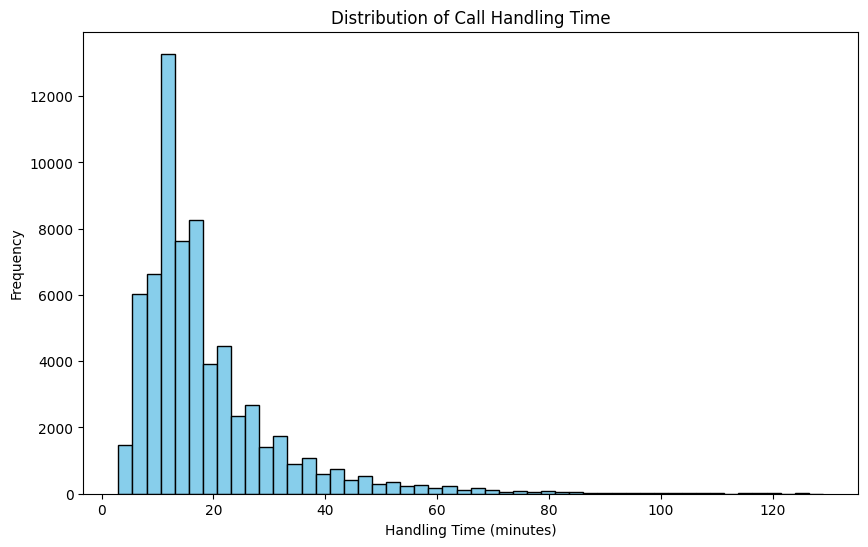

In [16]:

plt.figure(figsize=(10, 6))
plt.hist(merged_df['handling_time'] ,color='skyblue', bins=50, edgecolor='black')
plt.title('Distribution of Call Handling Time')
plt.xlabel('Handling Time (minutes)')
plt.ylabel('Frequency')
plt.show()

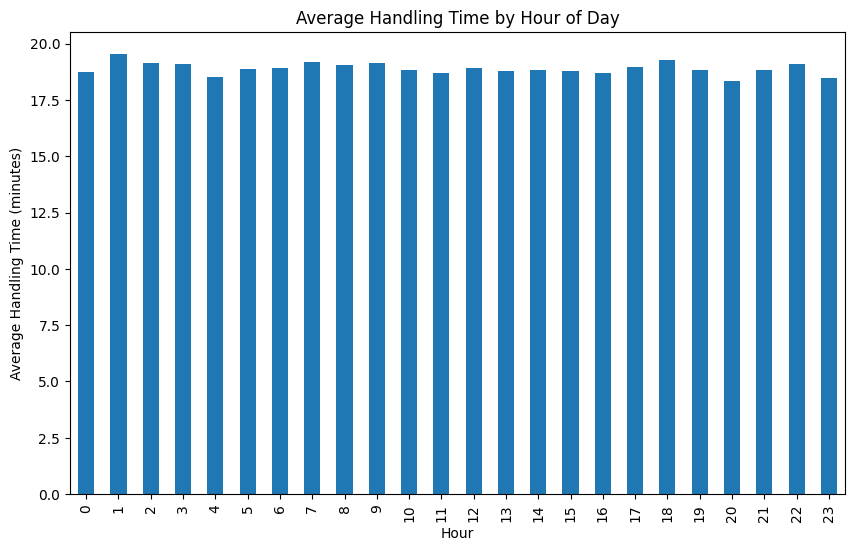

In [17]:

# Visualize average handling time by hour of day
merged_df['hour'] = merged_df['call_start_datetime'].dt.hour
hourly_handling_time = merged_df.groupby('hour')['handling_time'].mean()
plt.figure(figsize=(10, 6))
hourly_handling_time.plot(kind='bar')
plt.title('Average Handling Time by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Handling Time (minutes)')
plt.show()

In [18]:

short_call_threshold = 10
short_calls = merged_df[merged_df['handling_time'] < short_call_threshold]
print(f"\nCalls shorter than {short_call_threshold} minute: {len(short_calls)} ({len(short_calls)/len(merged_df)*100:.2f}%)")
print("Top reasons for short calls:")
print(short_calls['primary_call_reason'].value_counts().head())




Calls shorter than 10 minute: 10579 (15.87%)
Top reasons for short calls:
primary_call_reason
IRROPS                   2454
Booking                  1606
Communications           1077
Upgrade                   931
Products and Services     902
Name: count, dtype: int64


In [19]:
total_short_calls = len(short_calls)
total_handling_time_short_calls = short_calls['handling_time'].sum()
average_handling_time_short_calls = short_calls['handling_time'].mean()
# Assuming all short calls can be handled by IVR
time_saved_minutes = total_handling_time_short_calls  
short_calls_per_day = total_short_calls/7
time_saved_per_day = short_calls_per_day * average_handling_time_short_calls
count_number_of_agents = len(merged_df['agent_id'].unique())
time_saved_per_day_per_agent = time_saved_per_day/count_number_of_agents
print(f"\nTotal short calls per day: {short_calls_per_day:.2f}")
print(f"\nTotal agent time saved by switching to IVR for short calls: {time_saved_minutes} minutes")
print(f"Total agent time saved by switching to IVR for short calls: {time_saved_minutes/60} hours")
print(f"Total average handle time for short calls: {average_handling_time_short_calls} hours")
print(f"Total time saved per day per agent" , time_saved_per_day_per_agent, "minutes")



Total short calls per day: 1511.29

Total agent time saved by switching to IVR for short calls: 77752.0 minutes
Total agent time saved by switching to IVR for short calls: 1295.8666666666666 hours
Total average handle time for short calls: 7.349654976840911 hours
Total time saved per day per agent 29.001118985453186 minutes


In [20]:
long_call_threshold = 30
long_calls = merged_df[merged_df['handling_time'] > long_call_threshold]
print(f"\nCalls longer than {short_call_threshold} minute: {len(short_calls)} ({len(short_calls)/len(merged_df)*100:.2f}%)")
print("Top reasons for long calls:")
print(short_calls['primary_call_reason'].value_counts().head())


Calls longer than 10 minute: 10579 (15.87%)
Top reasons for long calls:
primary_call_reason
IRROPS                   2454
Booking                  1606
Communications           1077
Upgrade                   931
Products and Services     902
Name: count, dtype: int64


In [21]:

caller_frequency = merged_df.groupby('customer_id').size().sort_values(ascending=False)
repeat_callers = caller_frequency[caller_frequency > 1]
print(f"\nNumber of repeat callers: {len(repeat_callers)}")
print("Top 5 repeat callers:")
print(repeat_callers.head())


Number of repeat callers: 0
Top 5 repeat callers:
Series([], dtype: int64)


In [22]:
# 5. Analyze call volume patterns
merged_df['hour'] = merged_df['call_start_datetime'].dt.hour
merged_df['day_of_week'] = merged_df['call_start_datetime'].dt.dayofweek
hourly_volume = merged_df.groupby('hour').size()
daily_volume = merged_df.groupby('day_of_week').size()


In [23]:
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,handling_time,speed_to_answer,hour,day_of_week
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39,38.0,7.0,23,2
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,calm,neutral,0.02,0.35,15.0,3.0,0,3
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,neutral,polite,-0.13,0.32,27.0,8.0,23,2
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20,12.0,5.0,0,3
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35,19.0,10.0,0,3


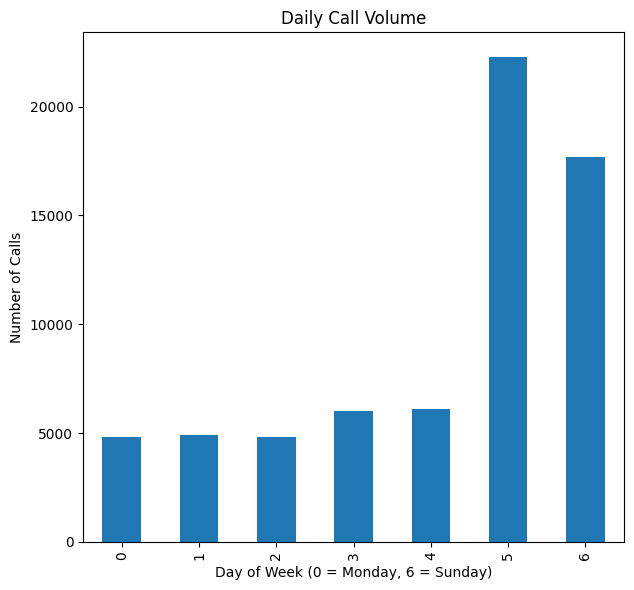

In [24]:
# Visualize call volume patterns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
daily_volume.plot(kind='bar')
plt.title('Daily Call Volume')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Calls')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Calls')

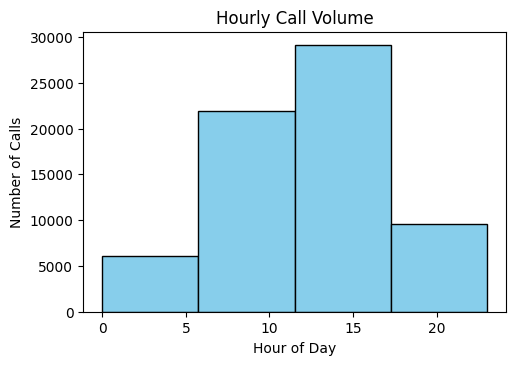

In [25]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(merged_df['hour'], bins=4, color='skyblue', edgecolor='black')
plt.title('Hourly Call Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')

In [26]:
# 4. Agent performance analysis
agent_performance = merged_df.groupby('agent_id').agg({
    'call_id': 'count',
    'handling_time': 'mean',
    'speed_to_answer': 'mean',
    'average_sentiment': 'mean'
}).sort_values('call_id', ascending=False).head(10)

print("\nTop 10 agents by call volume:")
print(agent_performance.head(10))


Top 10 agents by call volume:
          call_id  handling_time  speed_to_answer  average_sentiment
agent_id                                                            
251287        453      17.856512         7.282561          -0.033907
594957        442      17.990950         7.223982          -0.048277
963118        441      18.222222         7.328798          -0.051545
757349        423      18.309693         7.170213          -0.032340
686999        421      18.486936         7.237530          -0.036532
376343        420      17.600000         7.371429          -0.031952
965878        412      19.026699         7.536408          -0.043625
931734        412      19.271845         7.458738          -0.041917
542034        412      18.890777         7.138350          -0.034636
347606        411      18.615572         7.304136          -0.034331


In [27]:
# 5. Top 10 primary call reasons with their metrics
top_reasons = merged_df.groupby('primary_call_reason').agg({
    'call_id': 'count',
    'handling_time': 'mean',
    'speed_to_answer': 'mean',
    'average_sentiment': 'mean'
}).sort_values('call_id', ascending=False)

print("\nTop 10 primary call reasons with metrics:")
# print(top_reasons)


Top 10 primary call reasons with metrics:


In [28]:
most_frequent_reason = top_reasons.iloc[0]
least_frequent_reason = top_reasons.iloc[-1]

# Step 3: Calculate AHT for both reasons
most_frequent_aht = most_frequent_reason['handling_time']
least_frequent_aht = least_frequent_reason['handling_time']

# Step 4: Calculate the percentage difference
percentage_difference = ((most_frequent_aht - least_frequent_aht) / least_frequent_aht) * 100

# Output the results
print(f"\nMost Frequent Reason: {most_frequent_reason.name} - AHT: {most_frequent_aht} minutes")
print(f"Least Frequent Reason: {least_frequent_reason.name} - AHT: {least_frequent_aht} minutes")
print(f"Average AHT Percentage Difference: {percentage_difference:.2f}%")


Most Frequent Reason: IRROPS - AHT: 19.086620088648488 minutes
Least Frequent Reason: Unaccompanied Minor - AHT: 20.125 minutes
Average AHT Percentage Difference: -5.16%


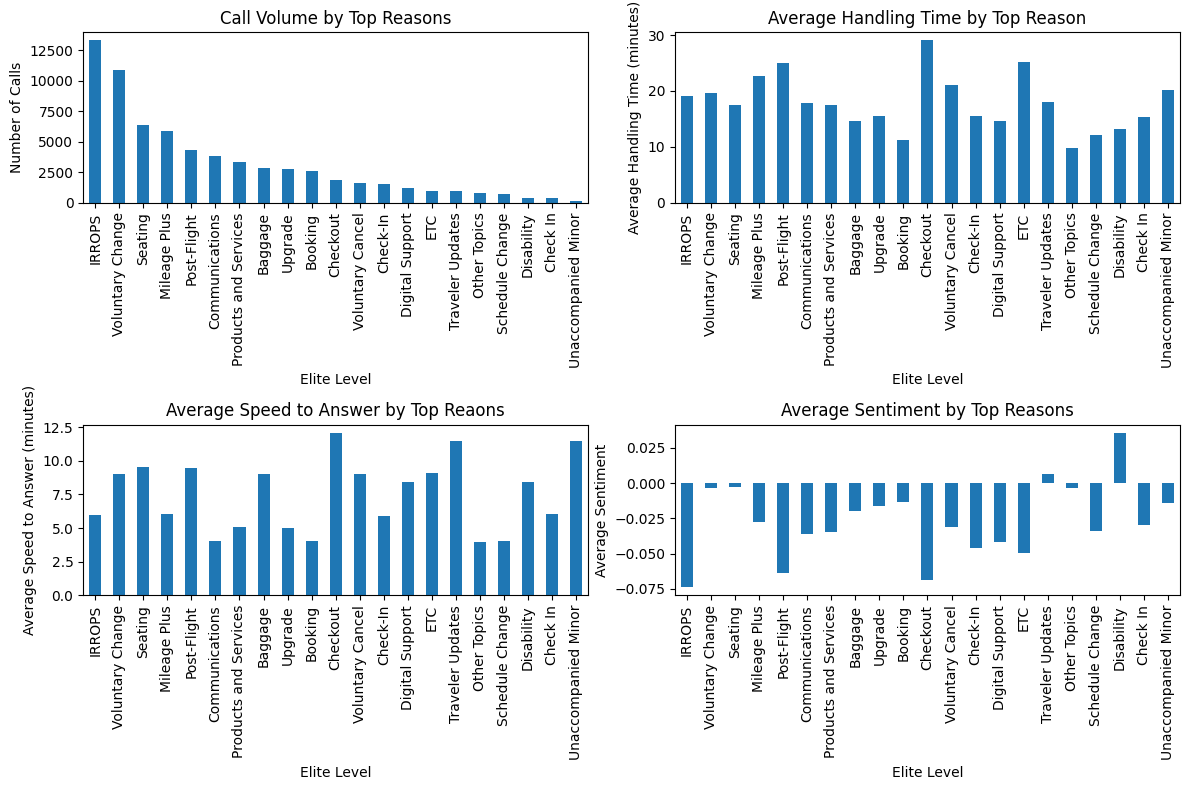

In [29]:
# Visualize metrics by elite level
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
top_reasons['call_id'].plot(kind='bar')
plt.title('Call Volume by Top Reasons')
plt.xlabel('Elite Level')
plt.ylabel('Number of Calls')

plt.subplot(2, 2, 2)
top_reasons['handling_time'].plot(kind='bar')
plt.title('Average Handling Time by Top Reason')
plt.xlabel('Elite Level')
plt.ylabel('Average Handling Time (minutes)')

plt.subplot(2, 2, 3)
top_reasons['speed_to_answer'].plot(kind='bar')
plt.title('Average Speed to Answer by Top Reaons')
plt.xlabel('Elite Level')
plt.ylabel('Average Speed to Answer (minutes)')

plt.subplot(2, 2, 4)
top_reasons['average_sentiment'].plot(kind='bar')
plt.title('Average Sentiment by Top Reasons')
plt.xlabel('Elite Level')
plt.ylabel('Average Sentiment')

plt.tight_layout()
plt.show()

In [30]:
# 6. Metrics by customer elite level
elite_level_metrics = merged_df.groupby('elite_level_code').agg({
    'call_id': 'count',
    'handling_time': 'mean',
    'speed_to_answer': 'mean',
    'average_sentiment': 'mean'
})

print("\nMetrics by customer elite level:")
print(elite_level_metrics)



Metrics by customer elite level:
                  call_id  handling_time  speed_to_answer  average_sentiment
elite_level_code                                                            
0.0                 13338      18.982606         7.303644          -0.033209
1.0                 13338      18.723872         7.272605          -0.035925
2.0                  7468      19.288029         7.214649          -0.031441
3.0                  5284      19.304883         7.155185          -0.032857
4.0                  1961      19.793473         6.900561          -0.036905
5.0                  1305      21.794636         6.832950          -0.029977


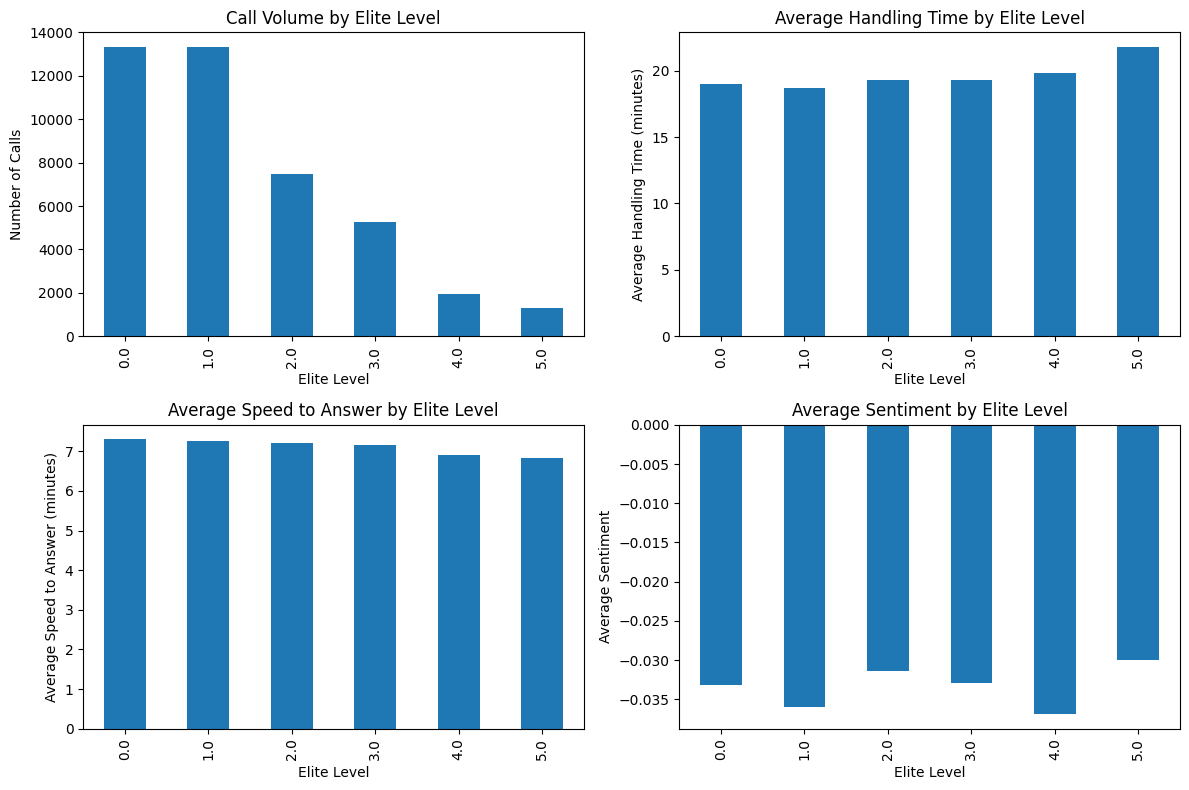

In [31]:
# Visualize metrics by elite level
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
elite_level_metrics['call_id'].plot(kind='bar')
plt.title('Call Volume by Elite Level')
plt.xlabel('Elite Level')
plt.ylabel('Number of Calls')

plt.subplot(2, 2, 2)
elite_level_metrics['handling_time'].plot(kind='bar')
plt.title('Average Handling Time by Elite Level')
plt.xlabel('Elite Level')
plt.ylabel('Average Handling Time (minutes)')

plt.subplot(2, 2, 3)
elite_level_metrics['speed_to_answer'].plot(kind='bar')
plt.title('Average Speed to Answer by Elite Level')
plt.xlabel('Elite Level')
plt.ylabel('Average Speed to Answer (minutes)')

plt.subplot(2, 2, 4)
elite_level_metrics['average_sentiment'].plot(kind='bar')
plt.title('Average Sentiment by Elite Level')
plt.xlabel('Elite Level')
plt.ylabel('Average Sentiment')

plt.tight_layout()
plt.show()

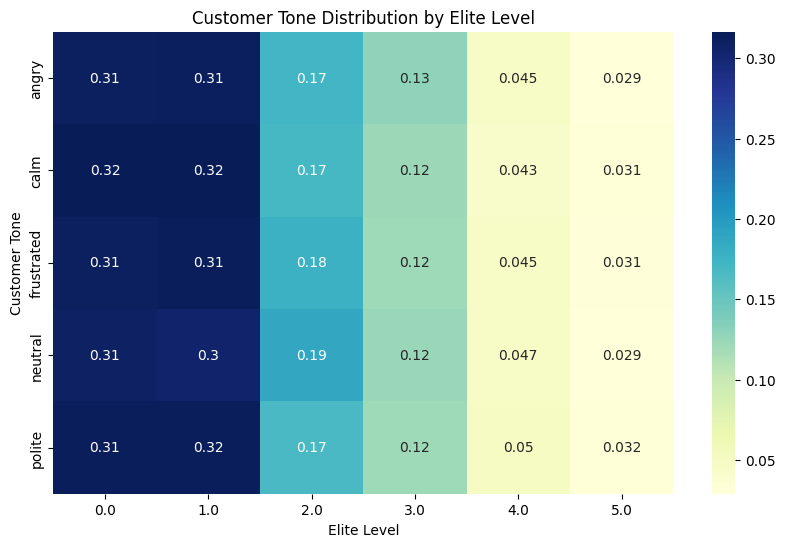

In [32]:
import seaborn as sns 
tone_elite_cross = pd.crosstab(merged_df['customer_tone'], merged_df['elite_level_code'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(tone_elite_cross, annot=True, cmap='YlGnBu')
plt.title('Customer Tone Distribution by Elite Level')
plt.xlabel('Elite Level')
plt.ylabel('Customer Tone')
plt.show()

In [33]:
import seaborn as sns 
# Handle categorical customer tone
merged_df['customer_tone'] = pd.Categorical(merged_df['customer_tone'])

# 1. Analyze call metrics by customer tone
tone_metrics = merged_df.groupby('customer_tone').agg({
    'call_id': 'count',
    'handling_time': 'mean',
    'speed_to_answer': 'mean',
    'average_sentiment': 'mean'
})

print("Metrics by Customer Tone:")
print(tone_metrics)

Metrics by Customer Tone:
               call_id  handling_time  speed_to_answer  average_sentiment
customer_tone                                                            
angry            13351      18.850198         7.281252          -0.032708
calm             13278      18.983732         7.287845          -0.032530
frustrated       13225      18.812552         7.274858          -0.034625
neutral          13402      19.060588         7.293688          -0.033754
polite           13397      18.804658         7.276629          -0.034524


C:\Users\nakul\AppData\Local\Temp\ipykernel_14572\2805513020.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tone_metrics = merged_df.groupby('customer_tone').agg({


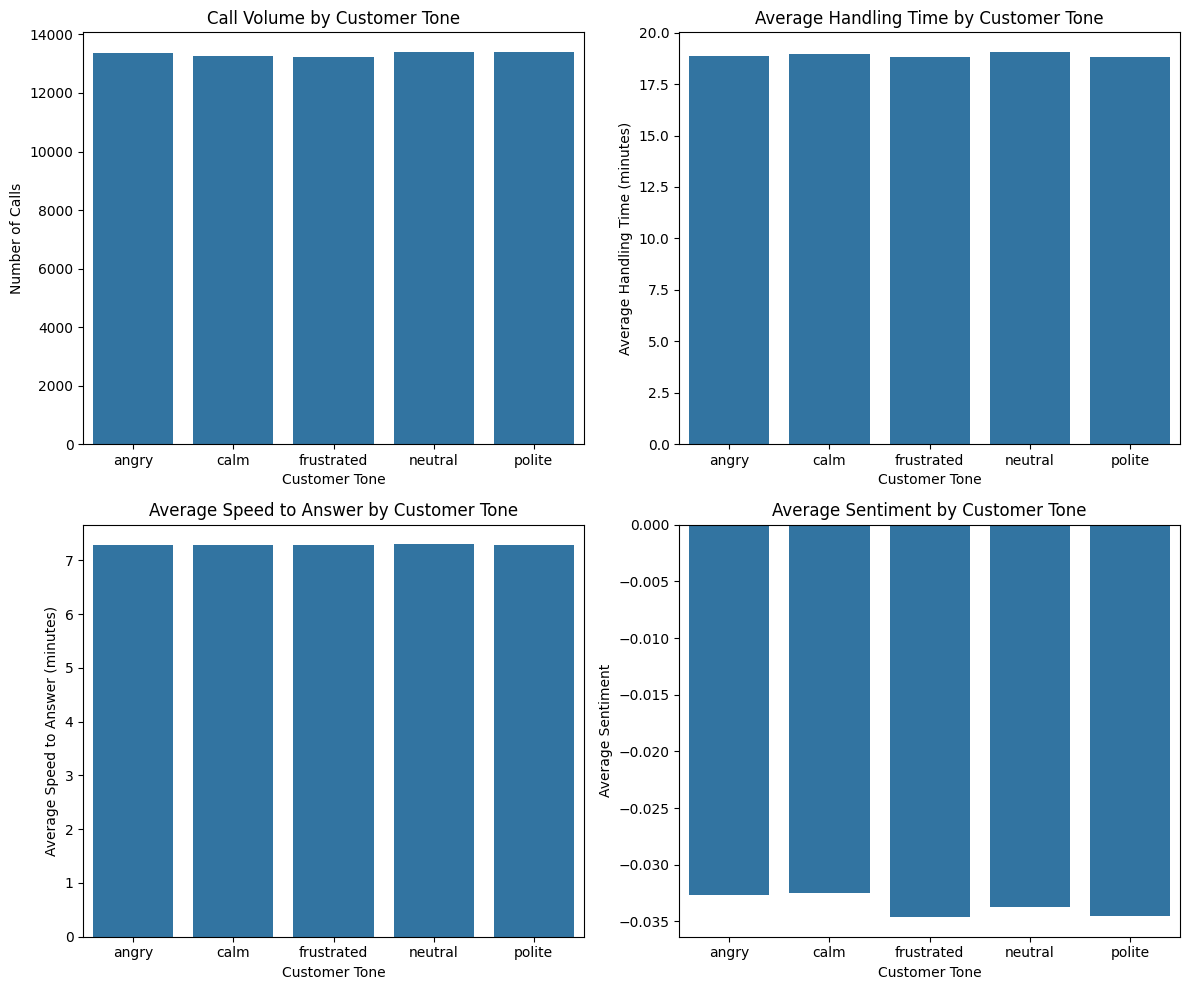

In [34]:
# Visualize metrics by customer tone
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.barplot(x=tone_metrics.index, y=tone_metrics['call_id'])
plt.title('Call Volume by Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Number of Calls')

plt.subplot(2, 2, 2)
sns.barplot(x=tone_metrics.index, y=tone_metrics['handling_time'])
plt.title('Average Handling Time by Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Average Handling Time (minutes)')

plt.subplot(2, 2, 3)
sns.barplot(x=tone_metrics.index, y=tone_metrics['speed_to_answer'])
plt.title('Average Speed to Answer by Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Average Speed to Answer (minutes)')

plt.subplot(2, 2, 4)
sns.barplot(x=tone_metrics.index, y=tone_metrics['average_sentiment'])
plt.title('Average Sentiment by Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Average Sentiment')

plt.tight_layout()
plt.show()

In [38]:
import seaborn as sns 
# Handle categorical customer tone
merged_df['customer_tone'] = pd.Categorical(merged_df['customer_tone'])

# 1. Analyze call metrics by customer tone
tone_metrics = merged_df.groupby('customer_tone').agg({
    'call_id': 'count',
    'handling_time': 'mean',
    'speed_to_answer': 'mean',
    'average_sentiment': 'mean'
})

print("Metrics by Customer Tone:")
print(tone_metrics)

Metrics by Customer Tone:
               call_id  handling_time  speed_to_answer  average_sentiment
customer_tone                                                            
angry            13351      18.850198         7.281252          -0.032708
calm             13278      18.983732         7.287845          -0.032530
frustrated       13225      18.812552         7.274858          -0.034625
neutral          13402      19.060588         7.293688          -0.033754
polite           13397      18.804658         7.276629          -0.034524


C:\Users\nakul\AppData\Local\Temp\ipykernel_14572\2795697727.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tone_metrics = merged_df.groupby('customer_tone').agg({
